In [ ]:
# Suppress warnings for clean output
import warnings
warnings.filterwarnings('ignore')

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib
matplotlib.use('Agg')  # Use non-interactive backend for matplotlib
import matplotlib.pyplot as plt
plt.switch_backend('Agg')  # Ensure plt uses the Agg backend
import seaborn as sns

# For machine learning
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

# Set inline plotting (in environments where it is necessary)
%matplotlib inline

# Set plot style for consistency and a pinch of elegance
sns.set(style='whitegrid')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [ ]:
file_path = '/content/drive/MyDrive/pipe_thickness_loss_dataset.csv'
df = pd.read_csv(file_path)
df.head()

Pipe_ID  Pipe_Size_mm  Diameter_mm  Thickness_mm   Material  Strength_MPa  \
0        1           747          565         24.25     Copper        269.38   
1        2           412         1407         14.04  Cast Iron        518.66   
2        3           320         1253          4.21   Aluminum        275.55   
3        4          1103         1639         25.03   Aluminum        380.29   
4        5           486         1822          7.60     Copper        279.03   

  Grade  Max_Pressure_Bar  Corrosion_Impact_Percent  Thickness_Loss_mm  \
0     B            142.90                     16.20               1.93   
1     B             53.72                      7.53               6.51   
2     A            197.64                     12.90               0.30   
3     C            186.96                     14.84               7.49   
4     D             91.39                      4.69               7.62   

   Material_Loss_Percent  Time_Years  Temperature_C Condition  
0                   8.58          22           22.3    Normal  
1                   9.33          17           60.6  Critical  
2                   2.42           7           -1.1    Normal  
3                   4.74           6           79.1  Critical  
4                   1.21          22           77.2  Critical

In [ ]:
df.head(10)

Pipe_ID  Pipe_Size_mm  Diameter_mm  Thickness_mm   Material  Strength_MPa  \
0        1           747          565         24.25     Copper        269.38   
1        2           412         1407         14.04  Cast Iron        518.66   
2        3           320         1253          4.21   Aluminum        275.55   
3        4          1103         1639         25.03   Aluminum        380.29   
4        5           486         1822          7.60     Copper        279.03   
5        6           190         1162         21.00   Aluminum        505.28   
6        7           591         1209         23.54      Steel        442.51   
7        8           924          785         18.29  Cast Iron        636.09   
8        9          1411         1519         12.35     Copper        667.06   
9       10           217         1244          3.16      Steel        386.68   

  Grade  Max_Pressure_Bar  Corrosion_Impact_Percent  Thickness_Loss_mm  \
0     B            142.90                     16.20               1.93   
1     B             53.72                      7.53               6.51   
2     A            197.64                     12.90               0.30   
3     C            186.96                     14.84               7.49   
4     D             91.39                      4.69               7.62   
5     C             46.83                      1.13               5.57   
6     C             93.44                     16.13               3.14   
7     D             93.62                      5.87               4.50   
8     D             36.91                     19.47               8.30   
9     E            129.77                     13.90               4.41   

   Material_Loss_Percent  Time_Years  Temperature_C Condition  
0                   8.58          22           22.3    Normal  
1                   9.33          17           60.6  Critical  
2                   2.42           7           -1.1    Normal  
3                   4.74           6           79.1  Critical  
4                   1.21          22           77.2  Critical  
5                   3.17          22           68.9  Critical  
6                   0.64          17           73.6  Moderate  
7                   4.51           2          102.7  Moderate  
8                   8.61           3           27.9  Critical  
9                   6.42           8          -20.5  Moderate

In [ ]:
df.shape

(1000, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pipe_ID                   1000 non-null   int64  
 1   Pipe_Size_mm              1000 non-null   int64  
 2   Diameter_mm               1000 non-null   int64  
 3   Thickness_mm              1000 non-null   float64
 4   Material                  1000 non-null   object 
 5   Strength_MPa              1000 non-null   float64
 6   Grade                     1000 non-null   object 
 7   Max_Pressure_Bar          1000 non-null   float64
 8   Corrosion_Impact_Percent  1000 non-null   float64
 9   Thickness_Loss_mm         1000 non-null   float64
 10  Material_Loss_Percent     1000 non-null   float64
 11  Time_Years                1000 non-null   int64  
 12  Temperature_C             1000 non-null   float64
 13  Condition                 1000 non-null   object 
dtypes: float6

In [ ]:
df.describe()

Pipe_ID  Pipe_Size_mm  Diameter_mm  Thickness_mm  Strength_MPa  \
count  1000.000000   1000.000000  1000.000000   1000.000000   1000.000000   
mean    500.500000    790.561000  1013.072000     16.516870    497.157060   
std     288.819436    418.868186   540.195932      7.805433    168.913032   
min       1.000000     53.000000   104.000000      3.060000    201.160000   
25%     250.750000    426.000000   570.000000      9.762500    350.765000   
50%     500.500000    785.000000   987.500000     16.415000    495.175000   
75%     750.250000   1149.000000  1452.500000     23.430000    640.335000   
max    1000.000000   1499.000000  1999.000000     29.980000    799.520000   

       Max_Pressure_Bar  Corrosion_Impact_Percent  Thickness_Loss_mm  \
count       1000.000000               1000.000000        1000.000000   
mean         104.848160                 10.085310           4.961850   
std           56.596569                  5.931709           2.851882   
min           10.480000                  0.010000           0.000000   
25%           54.362500                  4.960000           2.590000   
50%          101.315000                 10.195000           4.740000   
75%          155.947500                 15.407500           7.410000   
max          199.910000                 19.980000          10.000000   

       Material_Loss_Percent   Time_Years  Temperature_C  
count            1000.000000  1000.000000    1000.000000  
mean                4.922650    12.973000      38.952600  
std                 2.882145     7.069105      46.281236  
min                 0.000000     1.000000     -39.800000  
25%                 2.447500     7.000000      -1.700000  
50%                 4.790000    13.000000      36.350000  
75%                 7.452500    19.000000      80.825000  
max                 9.990000    24.000000     120.000000

In [ ]:
df.describe().T

count        mean         std     min       25%  \
Pipe_ID                   1000.0   500.50000  288.819436    1.00  250.7500   
Pipe_Size_mm              1000.0   790.56100  418.868186   53.00  426.0000   
Diameter_mm               1000.0  1013.07200  540.195932  104.00  570.0000   
Thickness_mm              1000.0    16.51687    7.805433    3.06    9.7625   
Strength_MPa              1000.0   497.15706  168.913032  201.16  350.7650   
Max_Pressure_Bar          1000.0   104.84816   56.596569   10.48   54.3625   
Corrosion_Impact_Percent  1000.0    10.08531    5.931709    0.01    4.9600   
Thickness_Loss_mm         1000.0     4.96185    2.851882    0.00    2.5900   
Material_Loss_Percent     1000.0     4.92265    2.882145    0.00    2.4475   
Time_Years                1000.0    12.97300    7.069105    1.00    7.0000   
Temperature_C             1000.0    38.95260   46.281236  -39.80   -1.7000   

                              50%        75%      max  
Pipe_ID                   500.500   750.2500  1000.00  
Pipe_Size_mm              785.000  1149.0000  1499.00  
Diameter_mm               987.500  1452.5000  1999.00  
Thickness_mm               16.415    23.4300    29.98  
Strength_MPa              495.175   640.3350   799.52  
Max_Pressure_Bar          101.315   155.9475   199.91  
Corrosion_Impact_Percent   10.195    15.4075    19.98  
Thickness_Loss_mm           4.740     7.4100    10.00  
Material_Loss_Percent       4.790     7.4525     9.99  
Time_Years                 13.000    19.0000    24.00  
Temperature_C              36.350    80.8250   120.00

In [ ]:
#Data Cleaning and Preprocessing

In [ ]:
df.isnull()

Pipe_ID  Pipe_Size_mm  Diameter_mm  Thickness_mm  Material  Strength_MPa  \
0      False         False        False         False     False         False   
1      False         False        False         False     False         False   
2      False         False        False         False     False         False   
3      False         False        False         False     False         False   
4      False         False        False         False     False         False   
..       ...           ...          ...           ...       ...           ...   
995    False         False        False         False     False         False   
996    False         False        False         False     False         False   
997    False         False        False         False     False         False   
998    False         False        False         False     False         False   
999    False         False        False         False     False         False   

     Grade  Max_Pressure_Bar  Corrosion_Impact_Percent  Thickness_Loss_mm  \
0    False             False                     False              False   
1    False             False                     False              False   
2    False             False                     False              False   
3    False             False                     False              False   
4    False             False                     False              False   
..     ...               ...                       ...                ...   
995  False             False                     False              False   
996  False             False                     False              False   
997  False             False                     False              False   
998  False             False                     False              False   
999  False             False                     False              False   

     Material_Loss_Percent  Time_Years  Temperature_C  Condition  
0                    False       False          False      False  
1                    False       False          False      False  
2                    False       False          False      False  
3                    False       False          False      False  
4                    False       False          False      False  
..                     ...         ...            ...        ...  
995                  False       False          False      False  
996                  False       False          False      False  
997                  False       False          False      False  
998                  False       False          False      False  
999                  False       False          False      False  

[1000 rows x 14 columns]

In [ ]:
df.isnull().sum()

Pipe_ID                     0
Pipe_Size_mm                0
Diameter_mm                 0
Thickness_mm                0
Material                    0
Strength_MPa                0
Grade                       0
Max_Pressure_Bar            0
Corrosion_Impact_Percent    0
Thickness_Loss_mm           0
Material_Loss_Percent       0
Time_Years                  0
Temperature_C               0
Condition                   0
dtype: int64

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print('Missing values in each column:')
print(missing_values)

# If any missing values need to be handled, we can fill or drop them as appropriate
# For demonstration, if missing, let's fill numeric missing values with the median and categorical ones with the mode
for col in df.columns:
    if df[col].dtype in [np.float64, np.int64]:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

# Verify data types
print('\nData types of each column:')
print(df.dtypes)

Missing values in each column:
Pipe_ID                     0
Pipe_Size_mm                0
Diameter_mm                 0
Thickness_mm                0
Material                    0
Strength_MPa                0
Grade                       0
Max_Pressure_Bar            0
Corrosion_Impact_Percent    0
Thickness_Loss_mm           0
Material_Loss_Percent       0
Time_Years                  0
Temperature_C               0
Condition                   0
dtype: int64

Data types of each column:
Pipe_ID                       int64
Pipe_Size_mm                  int64
Diameter_mm                   int64
Thickness_mm                float64
Material                     object
Strength_MPa                float64
Grade                        object
Max_Pressure_Bar            float64
Corrosion_Impact_Percent    float64
Thickness_Loss_mm           float64
Material_Loss_Percent       float64
Time_Years                    int64
Temperature_C               float64
Condition                    object
dtyp

In [ ]:
# EDA

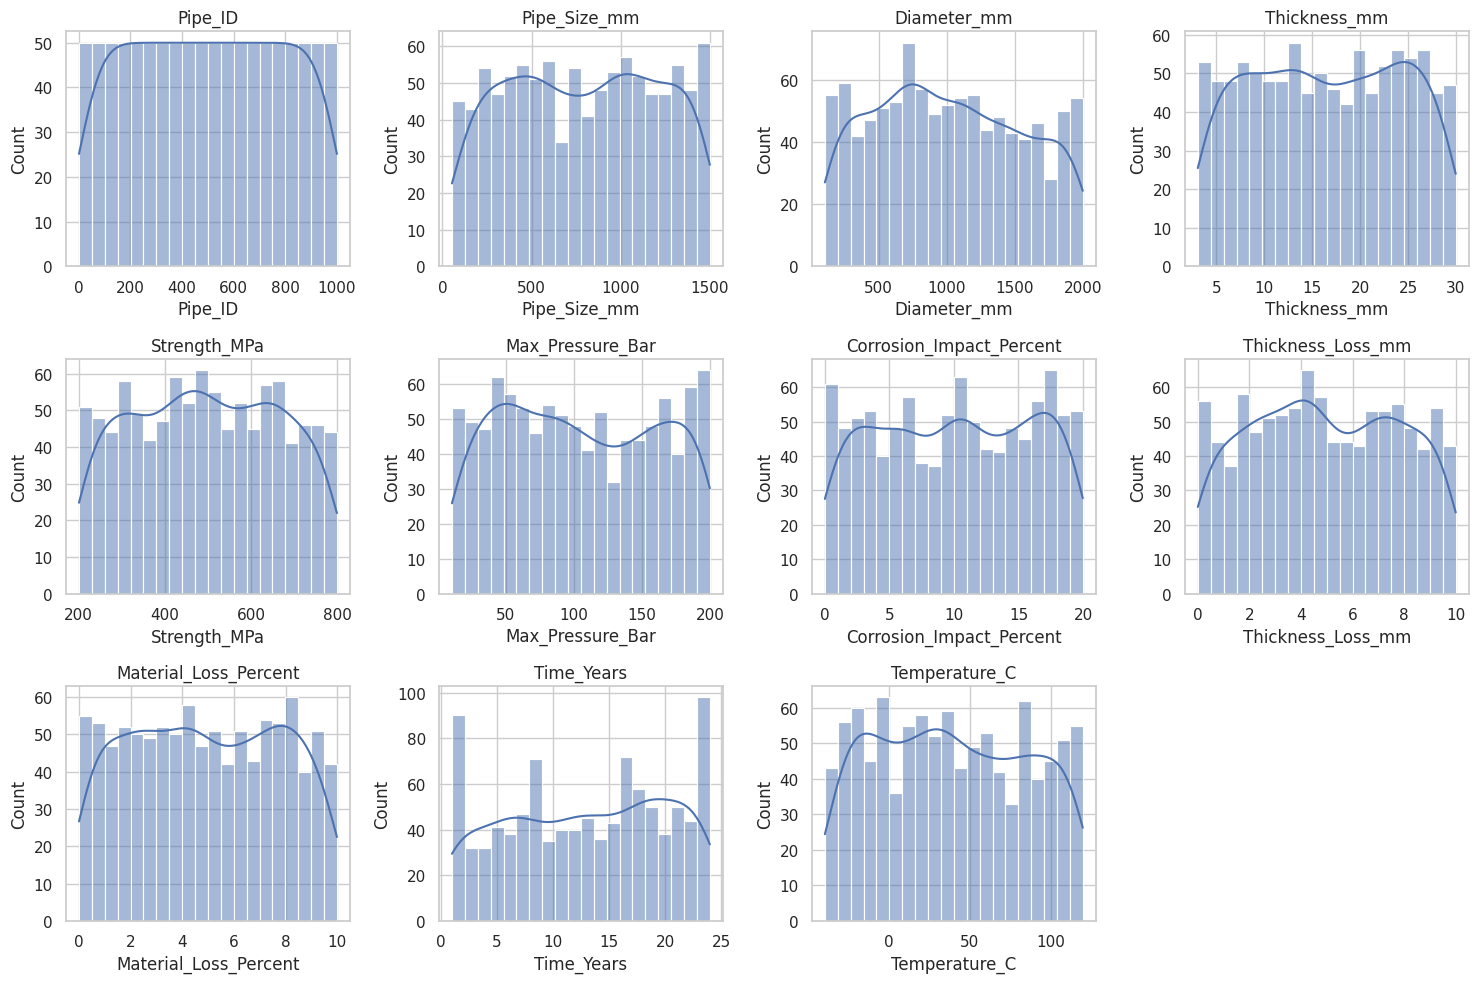

In [ ]:
# Visualize the distribution of numerical features
numeric_df = df.select_dtypes(include=[np.number])
numeric_columns = numeric_df.columns.tolist()

# Plot histograms for each numerical column
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(numeric_df[col], kde=True, bins=20)
    plt.title(col)
plt.tight_layout()
plt.show()

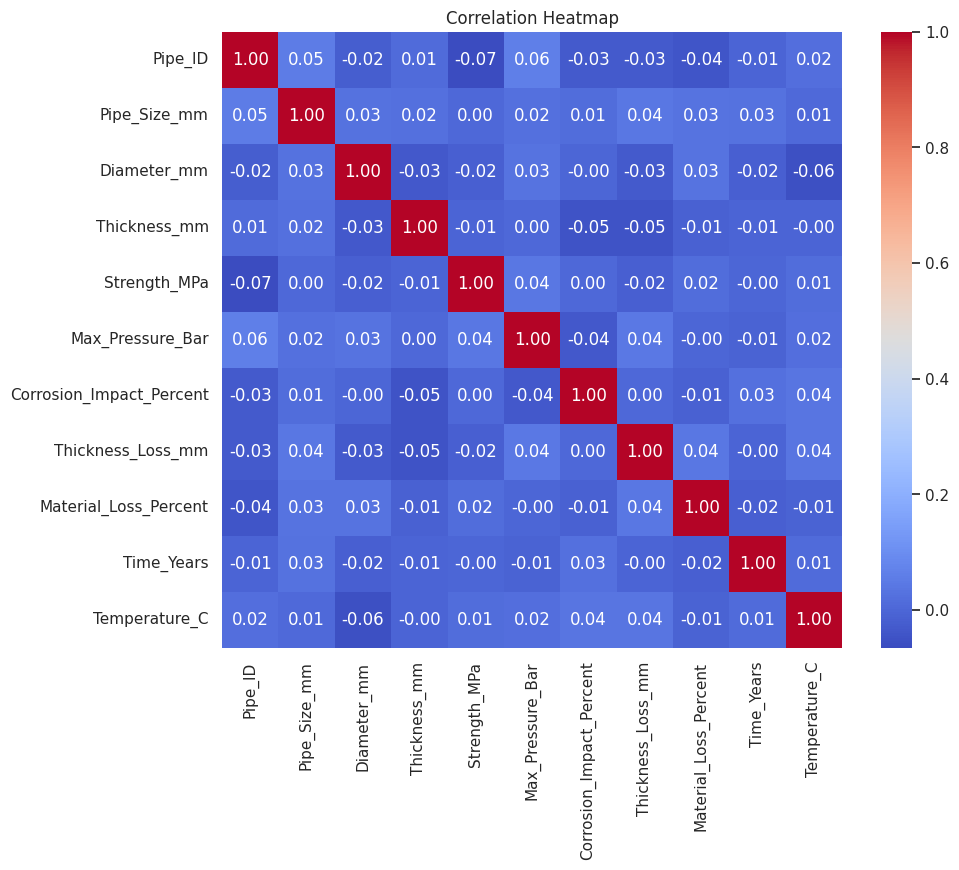

In [ ]:
# Heatmap for correlations if we have four or more numeric columns
if len(numeric_columns) >= 4:
    plt.figure(figsize=(10, 8))
    corr = numeric_df.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap')
    plt.show()

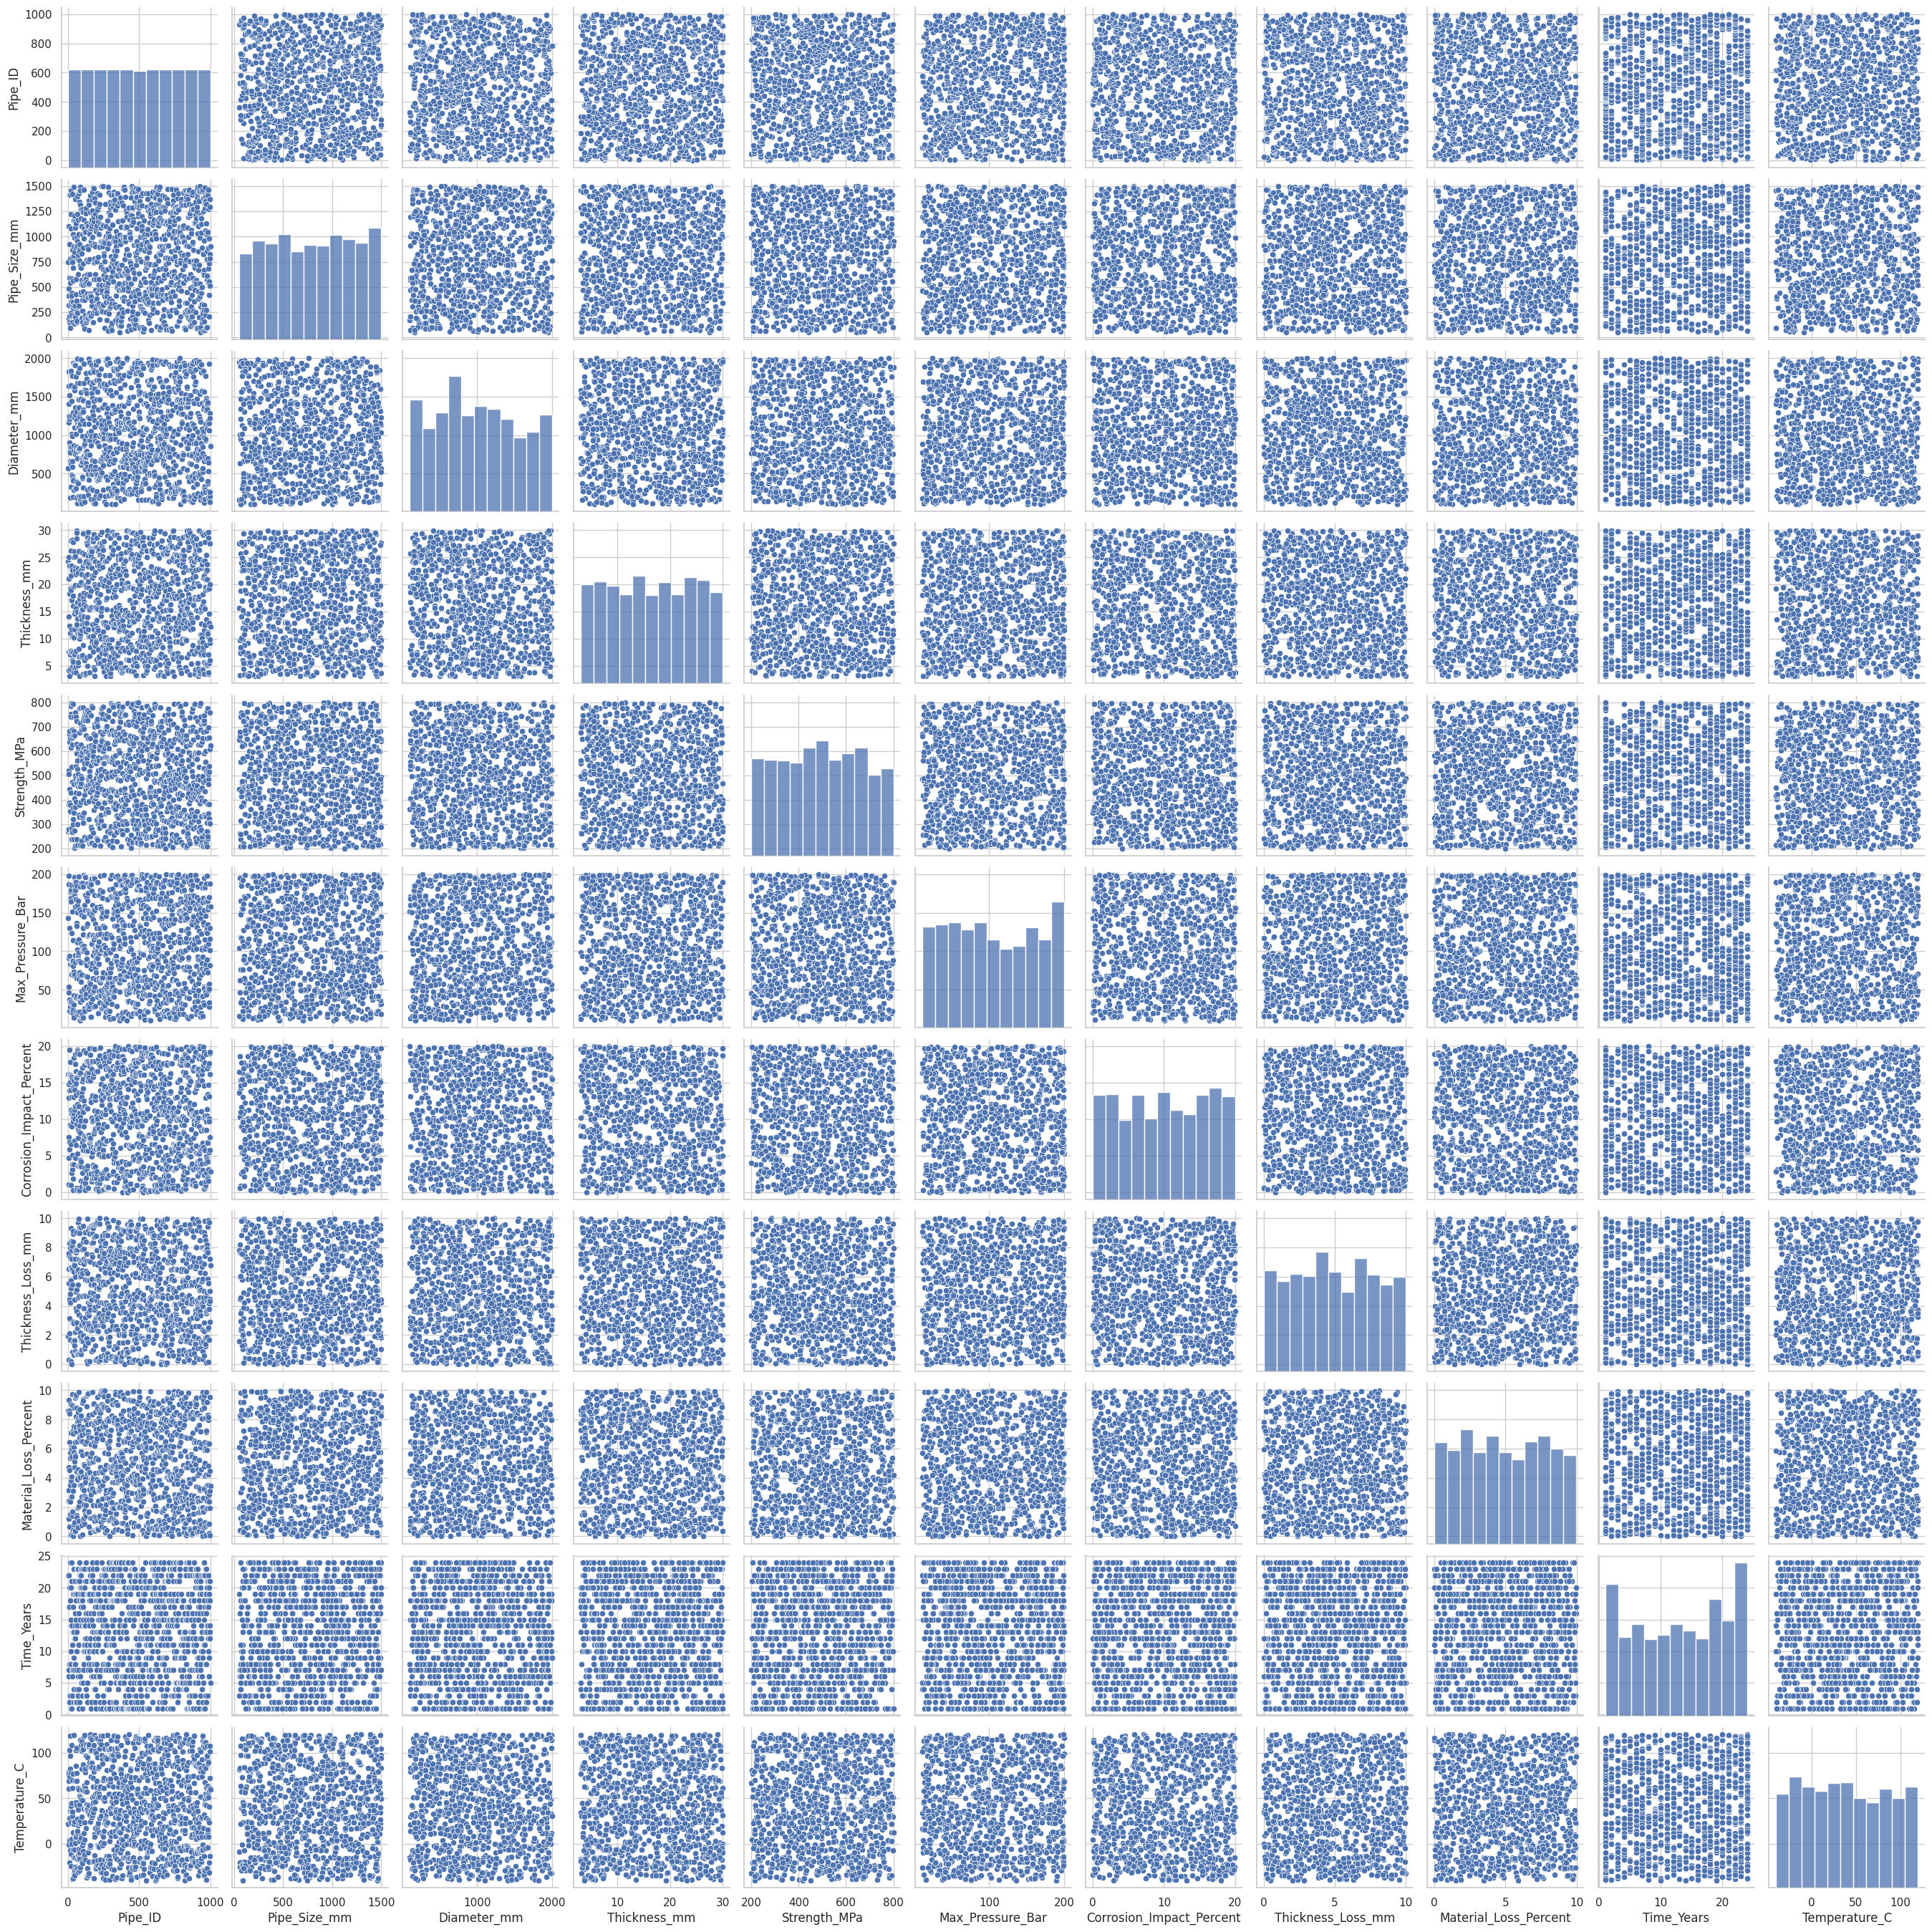

In [ ]:
# Pair Plot for numerical values
sns.pairplot(numeric_df)
plt.show()

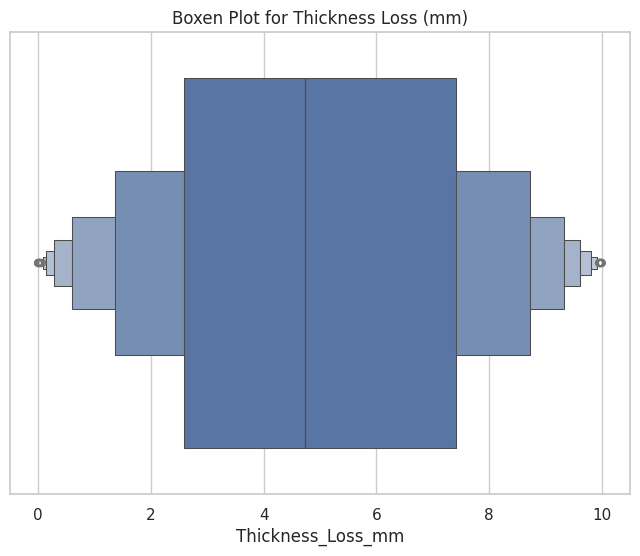

In [ ]:
# Boxen plot for detecting outliers in 'Thickness_Loss_mm'
plt.figure(figsize=(8, 6))
sns.boxenplot(x=df['Thickness_Loss_mm'])
plt.title('Boxen Plot for Thickness Loss (mm)')
plt.show()

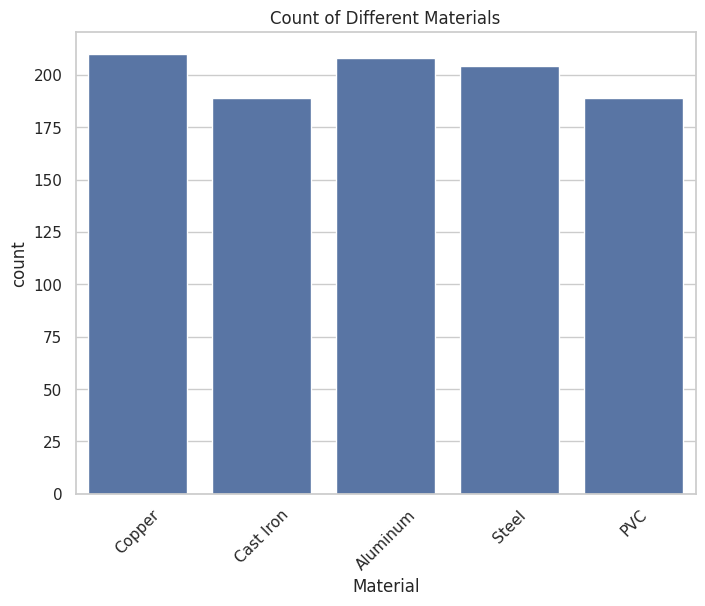

In [ ]:
#Count plot for categorical feature, example: Material
plt.figure(figsize=(8, 6))
sns.countplot(x=df['Material'])
plt.title('Count of Different Materials')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# prediction models

In [ ]:
# Features & target
X = df.drop(columns=["Thickness_Loss_mm", "Pipe_ID"]) # drop ID & target
y = df["Thickness_Loss_mm"]

In [ ]:
numeric_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(exclude=np.number).columns.tolist()

In [ ]:
# Preprocessing
numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

In [ ]:
# Base models to compare
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.01),
    "ElasticNet": ElasticNet(alpha=0.01, l1_ratio=0.5)
}

In [ ]:
results = {}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for name, model in models.items():
    pipe = Pipeline(steps=[("preprocessor", preprocessor), ("model", model)])
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)
    results[name] = {"RMSE": rmse, "R2": r2}

In [ ]:
# Polynomial Features with Linear Regression
poly_preprocessor = ColumnTransformer(
    transformers=[
        ("num", Pipeline([("poly", PolynomialFeatures(degree=2, include_bias=False)),
                          ("scaler", StandardScaler())]), numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

In [ ]:
poly_pipe = Pipeline(steps=[("preprocessor", poly_preprocessor), ("model", LinearRegression())])
poly_pipe.fit(X_train, y_train)
poly_preds = poly_pipe.predict(X_test)
poly_rmse = np.sqrt(mean_squared_error(y_test, poly_preds))
poly_r2 = r2_score(y_test, poly_preds)
results["PolynomialLinearRegression"] = {"RMSE": poly_rmse, "R2": poly_r2}



In [ ]:
import pandas as pd

# Results dictionary you already had
results = {
    "LinearRegression": {"RMSE": 1.068, "R2": 0.8445},
    "Ridge": {"RMSE": 1.067, "R2": 0.8447},
    "Lasso": {"RMSE": 1.064, "R2": 0.8457},
    "ElasticNet": {"RMSE": 1.064, "R2": 0.8458},
    "PolynomialLinearRegression": {"RMSE": 1.093, "R2": 0.8372}
}

# Convert to DataFrame
baseline_df = pd.DataFrame(results).T
baseline_df.index.name = "Model"
baseline_df = baseline_df.reset_index()

print(baseline_df)


                        Model   RMSE      R2
0            LinearRegression  1.068  0.8445
1                       Ridge  1.067  0.8447
2                       Lasso  1.064  0.8457
3                  ElasticNet  1.064  0.8458
4  PolynomialLinearRegression  1.093  0.8372


In [ ]:
import pandas as pd

# Results dictionary
results = {
    "LinearRegression": {"RMSE": 1.068, "R2": 0.8445},
    "Ridge": {"RMSE": 1.067, "R2": 0.8447},
    "Lasso": {"RMSE": 1.064, "R2": 0.8457},
    "ElasticNet": {"RMSE": 1.064, "R2": 0.8458},
    "PolynomialLinearRegression": {"RMSE": 1.093, "R2": 0.8372}
}

# Convert to DataFrame
baseline_df = pd.DataFrame(results).T
baseline_df.index.name = "Model"
baseline_df = baseline_df.reset_index()

# Sort by RMSE (ascending = best first)
baseline_df_sorted = baseline_df.sort_values(by="RMSE", ascending=True).reset_index(drop=True)

print(baseline_df_sorted)


                        Model   RMSE      R2
0                  ElasticNet  1.064  0.8458
1                       Lasso  1.064  0.8457
2                       Ridge  1.067  0.8447
3            LinearRegression  1.068  0.8445
4  PolynomialLinearRegression  1.093  0.8372


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd

# Parameter distributions for tuning
param_dists = {
    "Ridge": {"model__alpha": np.logspace(-3, 2, 50)},  # 0.001 → 100
    "Lasso": {"model__alpha": np.logspace(-4, 1, 50)},  # 0.0001 → 10
    "ElasticNet": {
        "model__alpha": np.logspace(-4, 1, 50),
        "model__l1_ratio": np.linspace(0.1, 0.9, 9)
    }
}

# Models to tune
candidates = [
    ("Lasso", Lasso(max_iter=5000, random_state=42)),
    ("ElasticNet", ElasticNet(max_iter=5000, random_state=42)),
    # ("Ridge", Ridge(random_state=42))  # optional, uncomment if you want
]

tuned_results = {}
best_models = {}

for name, model in candidates:
    pipe = Pipeline(steps=[("preprocessor", preprocessor), ("model", model)])
    rand_search = RandomizedSearchCV(
        pipe,
        param_dists[name],
        n_iter=20,                # number of parameter combinations to test
        scoring="neg_root_mean_squared_error",
        cv=3,                     # 3-fold CV to save time
        n_jobs=-1,
        random_state=42,
        verbose=1
    )
    rand_search.fit(X_train, y_train)

    best_models[name] = rand_search.best_estimator_
    preds = rand_search.best_estimator_.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)

    tuned_results[name] = {
        "Best Params": rand_search.best_params_,
        "CV Best RMSE": -rand_search.best_score_,
        "Test RMSE": rmse,
        "Test R2": r2
    }

# Display results in DataFrame
tuned_df = pd.DataFrame(tuned_results).T
print(tuned_df)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Fitting 3 folds for each of 20 candidates, totalling 60 fits
                                                  Best Params CV Best RMSE  \
Lasso                   {'model__alpha': 0.04498432668969444}     1.143286   
ElasticNet  {'model__l1_ratio': 0.7000000000000001, 'model...     1.156152   

           Test RMSE   Test R2  
Lasso       1.064853  0.845486  
ElasticNet  1.061693  0.846401  


In [ ]:
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Define parameter distributions for SVR and KNN
param_dists.update({
    "SVR": {
        "model__kernel": ["linear", "rbf", "poly"],
        "model__C": np.logspace(-2, 2, 20),   # 0.01 → 100
        "model__gamma": ["scale", "auto"]
    },
    "KNN": {
        "model__n_neighbors": range(2, 30),
        "model__weights": ["uniform", "distance"],
        "model__p": [1, 2]  # 1 = Manhattan, 2 = Euclidean
    }
})

# Add SVR and KNN to candidates
candidates.extend([
    ("SVR", SVR()),
    ("KNN", KNeighborsRegressor())
])

# Tune and evaluate all models
tuned_results = {}
best_models = {}

for name, model in candidates:
    pipe = Pipeline(steps=[("preprocessor", preprocessor), ("model", model)])
    rand_search = RandomizedSearchCV(
        pipe,
        param_dists[name],
        n_iter=20,                # 20 samples from parameter space
        scoring="neg_root_mean_squared_error",
        cv=3,
        n_jobs=-1,
        random_state=42,
        verbose=1
    )
    rand_search.fit(X_train, y_train)

    best_models[name] = rand_search.best_estimator_
    preds = rand_search.best_estimator_.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)

    tuned_results[name] = {
        "Best Params": rand_search.best_params_,
        "CV Best RMSE": -rand_search.best_score_,
        "Test RMSE": rmse,
        "Test R2": r2
    }

# Put results in a sorted DataFrame
tuned_df = pd.DataFrame(tuned_results).T.reset_index().rename(columns={"index": "Model"})
tuned_df = tuned_df.sort_values(by="Test RMSE", ascending=True).reset_index(drop=True)

print(tuned_df)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Fitting 3 folds for each of 20 candidates, totalling 60 fits
        Model                                        Best Params CV Best RMSE  \
0  ElasticNet  {'model__l1_ratio': 0.7000000000000001, 'model...     1.156152   
1       Lasso              {'model__alpha': 0.04498432668969444}     1.143286   
2         SVR  {'model__kernel': 'linear', 'model__gamma': 's...     1.214657   
3         KNN  {'model__weights': 'distance', 'model__p': 1, ...     1.696256   

  Test RMSE   Test R2  
0  1.061693  0.846401  
1  1.064853  0.845486  
2  1.068287  0.844488  
3  1.481853  0.700774  


In [ ]:
import pandas as pd

# Convert tuned results into DataFrame
tuned_df = pd.DataFrame(tuned_results).T.reset_index().rename(columns={"index": "Model"})

# Order columns for readability
tuned_df = tuned_df[["Model", "Best Params", "CV Best RMSE", "Test RMSE", "Test R2"]]

# Sort by Test RMSE (ascending = best first)
tuned_df = tuned_df.sort_values(by="Test RMSE", ascending=True).reset_index(drop=True)

print("\n📊 Hyperparameter Tuning Results:")
print(tuned_df)



📊 Hyperparameter Tuning Results:
        Model                                        Best Params CV Best RMSE  \
0  ElasticNet  {'model__l1_ratio': 0.7000000000000001, 'model...     1.156152   
1       Lasso              {'model__alpha': 0.04498432668969444}     1.143286   
2         SVR  {'model__kernel': 'linear', 'model__gamma': 's...     1.214657   
3         KNN  {'model__weights': 'distance', 'model__p': 1, ...     1.696256   

  Test RMSE   Test R2  
0  1.061693  0.846401  
1  1.064853  0.845486  
2  1.068287  0.844488  
3  1.481853  0.700774  


In [ ]:
# Baseline results (from earlier)
baseline_results = {
    "LinearRegression": {"RMSE": 1.068, "R2": 0.8445},
    "Ridge": {"RMSE": 1.067, "R2": 0.8447},
    "Lasso": {"RMSE": 1.064, "R2": 0.8457},
    "ElasticNet": {"RMSE": 1.064, "R2": 0.8458},
    "PolynomialLinearRegression": {"RMSE": 1.093, "R2": 0.8372}
}

baseline_df = pd.DataFrame(baseline_results).T.reset_index().rename(columns={
    "index": "Model", "RMSE": "Test RMSE", "R2": "Test R2"
})
baseline_df["Type"] = "Baseline"
baseline_df["Best Params"] = None
baseline_df["CV Best RMSE"] = None

# Tuned results (from RandomizedSearchCV)
tuned_df = pd.DataFrame(tuned_results).T.reset_index().rename(columns={"index": "Model"})
tuned_df = tuned_df[["Model", "Best Params", "CV Best RMSE", "Test RMSE", "Test R2"]]
tuned_df["Type"] = "Tuned"

# Combine both
combined_df = pd.concat([baseline_df, tuned_df], ignore_index=True)

# Sort by Test RMSE (best → worst)
combined_df = combined_df.sort_values(by="Test RMSE", ascending=True).reset_index(drop=True)

print("\n📊 Combined Baseline + Tuned Results:")
print(combined_df)



📊 Combined Baseline + Tuned Results:
                        Model Test RMSE   Test R2      Type  \
0                  ElasticNet  1.061693  0.846401     Tuned   
1                       Lasso     1.064    0.8457  Baseline   
2                  ElasticNet     1.064    0.8458  Baseline   
3                       Lasso  1.064853  0.845486     Tuned   
4                       Ridge     1.067    0.8447  Baseline   
5            LinearRegression     1.068    0.8445  Baseline   
6                         SVR  1.068287  0.844488     Tuned   
7  PolynomialLinearRegression     1.093    0.8372  Baseline   
8                         KNN  1.481853  0.700774     Tuned   

                                         Best Params CV Best RMSE  
0  {'model__l1_ratio': 0.7000000000000001, 'model...     1.156152  
1                                               None         None  
2                                               None         None  
3              {'model__alpha': 0.04498432668969444}     1.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

# Tree-based models (baseline, no tuning)
tree_models = {
    "DecisionTree": DecisionTreeRegressor(random_state=42),
    "RandomForest": RandomForestRegressor(random_state=42, n_jobs=-1),
    "GradientBoosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, n_jobs=-1, verbosity=0),
    "LightGBM": LGBMRegressor(random_state=42, n_jobs=-1, verbose=-1),
    "CatBoost": CatBoostRegressor(random_state=42, verbose=0)
}

tree_results = {}

for name, model in tree_models.items():
    pipe = Pipeline(steps=[("preprocessor", preprocessor), ("model", model)])
    pipe.fit(X_train, y_train)

    preds = pipe.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)

    tree_results[name] = {"Test RMSE": rmse, "Test R2": r2}

# Convert to DataFrame
tree_df = pd.DataFrame(tree_results).T.reset_index().rename(columns={"index": "Model"})
tree_df["Type"] = "Tree Baseline"
tree_df["Best Params"] = None
tree_df["CV Best RMSE"] = None

# Merge with previous combined results
final_df = pd.concat([combined_df, tree_df], ignore_index=True)

# Sort by Test RMSE
final_df = final_df.sort_values(by="Test RMSE", ascending=True).reset_index(drop=True)

print("\n📊 Combined Results with Tree-Based Models:")
print(final_df)



📊 Combined Results with Tree-Based Models:
                         Model Test RMSE   Test R2           Type  \
0                   ElasticNet  1.061693  0.846401          Tuned   
1                        Lasso     1.064    0.8457       Baseline   
2                   ElasticNet     1.064    0.8458       Baseline   
3                        Lasso  1.064853  0.845486          Tuned   
4                        Ridge     1.067    0.8447       Baseline   
5             LinearRegression     1.068    0.8445       Baseline   
6                          SVR  1.068287  0.844488          Tuned   
7             GradientBoosting  1.075633  0.842342  Tree Baseline   
8                 RandomForest  1.081033  0.840755  Tree Baseline   
9   PolynomialLinearRegression     1.093    0.8372       Baseline   
10                    CatBoost  1.112728   0.83128  Tree Baseline   
11                    LightGBM  1.147149   0.82068  Tree Baseline   
12                     XGBoost  1.215276  0.798749  Tree Ba

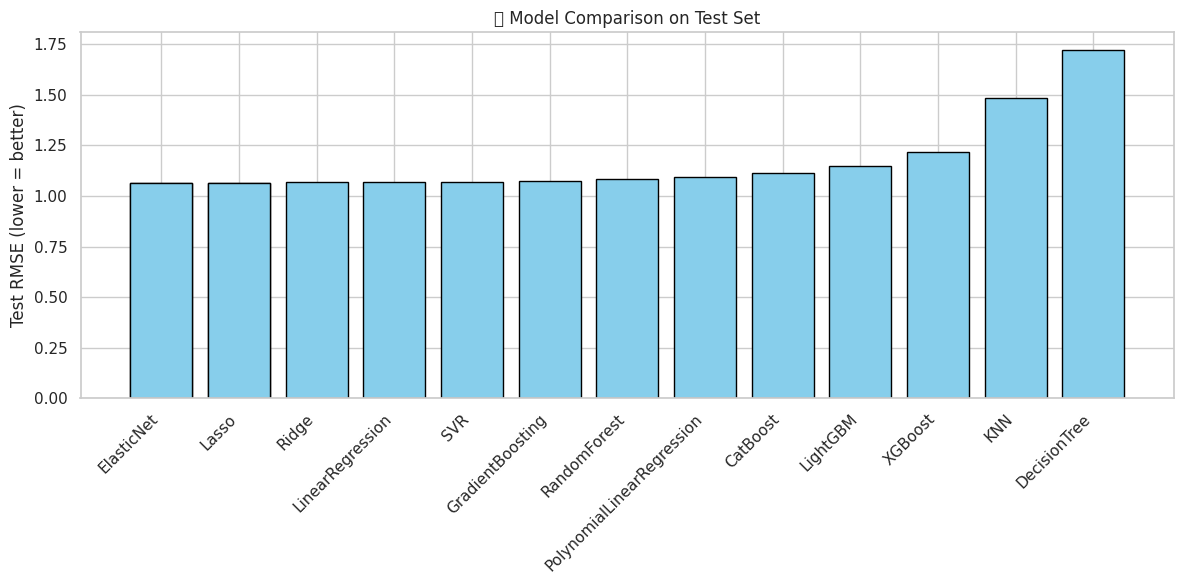

In [ ]:
import matplotlib.pyplot as plt

# --- Plot RMSE for all models ---
plt.figure(figsize=(12, 6))
plt.bar(final_df["Model"], final_df["Test RMSE"], color="skyblue", edgecolor="black")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Test RMSE (lower = better)")
plt.title("📊 Model Comparison on Test Set")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Parameter distributions for tuning
param_dists_tree = {
    "RandomForest": {
        "model__n_estimators": [100, 200, 300, 500],
        "model__max_depth": [None, 5, 10, 20],
        "model__min_samples_split": [2, 5, 10],
        "model__min_samples_leaf": [1, 2, 4]
    },
    "GradientBoosting": {
        "model__n_estimators": [100, 200, 300],
        "model__learning_rate": [0.01, 0.05, 0.1, 0.2],
        "model__max_depth": [3, 5, 7]
    },
    "XGBoost": {
        "model__n_estimators": [200, 400, 600],
        "model__learning_rate": [0.01, 0.05, 0.1],
        "model__max_depth": [3, 5, 7, 10],
        "model__subsample": [0.7, 0.8, 1.0],
        "model__colsample_bytree": [0.7, 0.8, 1.0]
    },
    "LightGBM": {
        "model__n_estimators": [200, 400, 600],
        "model__learning_rate": [0.01, 0.05, 0.1],
        "model__num_leaves": [31, 50, 100],
        "model__max_depth": [-1, 5, 10, 20]
    },
    "CatBoost": {
        "model__iterations": [300, 500, 800],
        "model__learning_rate": [0.01, 0.05, 0.1],
        "model__depth": [4, 6, 8, 10]
    }
}

# Tree models again
tune_candidates = [
    ("RandomForest", RandomForestRegressor(random_state=42, n_jobs=-1)),
    ("GradientBoosting", GradientBoostingRegressor(random_state=42)),
    ("XGBoost", XGBRegressor(random_state=42, n_jobs=-1, verbosity=0)),
    ("LightGBM", LGBMRegressor(random_state=42, n_jobs=-1, verbose=-1)),
    ("CatBoost", CatBoostRegressor(random_state=42, verbose=0))
]

tuned_tree_results = {}
best_tree_models = {}

for name, model in tune_candidates:
    pipe = Pipeline(steps=[("preprocessor", preprocessor), ("model", model)])
    rand_search = RandomizedSearchCV(
        pipe,
        param_dists_tree[name],
        n_iter=20,                 # sample 20 combos
        scoring="neg_root_mean_squared_error",
        cv=3,
        n_jobs=-1,
        random_state=42,
        verbose=1
    )
    rand_search.fit(X_train, y_train)

    best_tree_models[name] = rand_search.best_estimator_
    preds = rand_search.best_estimator_.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)

    tuned_tree_results[name] = {
        "Best Params": rand_search.best_params_,
        "CV Best RMSE": -rand_search.best_score_,
        "Test RMSE": rmse,
        "Test R2": r2
    }

# Convert to DataFrame
tuned_tree_df = pd.DataFrame(tuned_tree_results).T.reset_index().rename(columns={"index": "Model"})
tuned_tree_df = tuned_tree_df[["Model", "Best Params", "CV Best RMSE", "Test RMSE", "Test R2"]]
tuned_tree_df["Type"] = "Tree Tuned"

# Merge with final_df (baselines + tuned linear + tree baselines)
grand_df = pd.concat([final_df, tuned_tree_df], ignore_index=True)
grand_df = grand_df.sort_values(by="Test RMSE", ascending=True).reset_index(drop=True)

print("\n🏆 Final Combined Results (All Models with Hyperparameter Tuning):")
print(grand_df)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Fitting 3 folds for each of 20 candidates, totalling 60 fits

🏆 Final Combined Results (All Models with Hyperparameter Tuning):
                         Model Test RMSE   Test R2           Type  \
0                   ElasticNet  1.061693  0.846401          Tuned   
1             GradientBoosting  1.063059  0.846006     Tree Tuned   
2                 RandomForest    1.0634  0.845907     Tree Tuned   
3                        Lasso     1.064    0.8457       Baseline   
4                   ElasticNet     1.064    0.8458       Baseline   
5                        Lasso  1.064853  0.845486          Tuned   
6                      XGBoost  1.066656  0.844962     Tree Tuned   
7                        Ridge     1.067    0.8447       Baseline   
8      

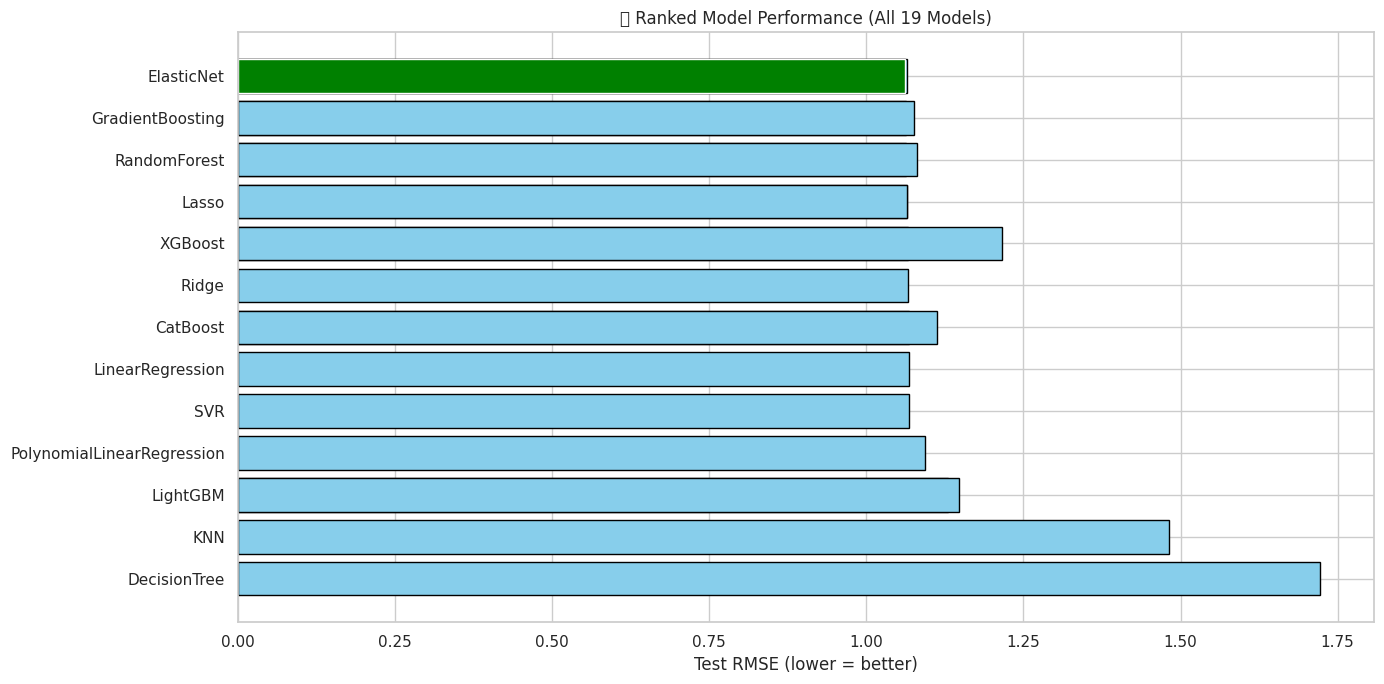

In [ ]:
import matplotlib.pyplot as plt

# --- Ranked Bar Chart for All 19 Models ---
plt.figure(figsize=(14, 7))

# Sort by RMSE so the best model is on top
plot_df = grand_df.sort_values(by="Test RMSE", ascending=True)

plt.barh(plot_df["Model"], plot_df["Test RMSE"], color="skyblue", edgecolor="black")

# Highlight best model
plt.barh(plot_df["Model"].iloc[0], plot_df["Test RMSE"].iloc[0], color="green")

plt.xlabel("Test RMSE (lower = better)")
plt.title("🏆 Ranked Model Performance (All 19 Models)")
plt.gca().invert_yaxis()  # Best model at the top
plt.tight_layout()
plt.show()


In [ ]:
# feature importances for cat decision besed model

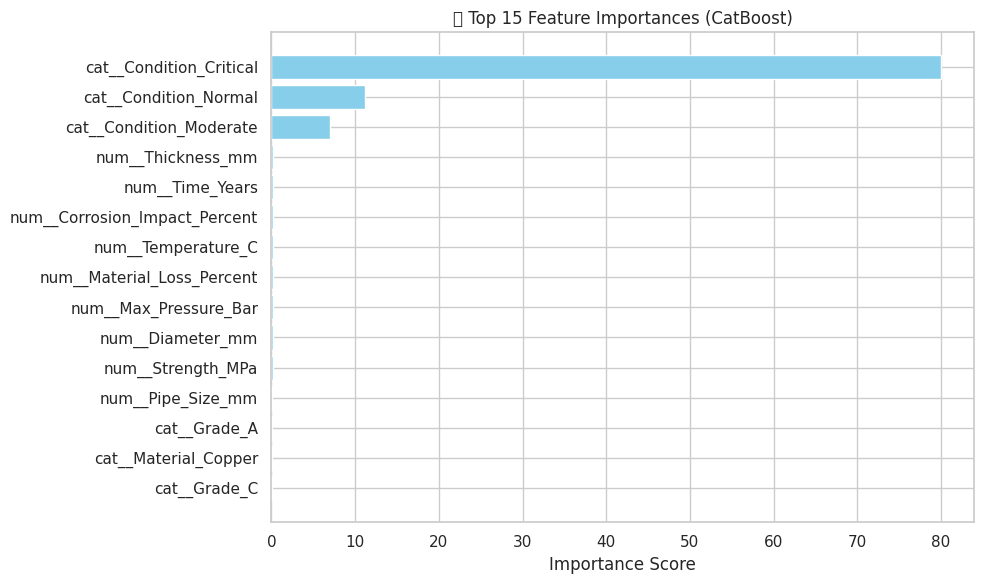

                          Feature  Importance
0         cat__Condition_Critical   79.948019
1           cat__Condition_Normal   11.232225
2         cat__Condition_Moderate    6.941878
3               num__Thickness_mm    0.211998
4                 num__Time_Years    0.195642
5   num__Corrosion_Impact_Percent    0.180232
6              num__Temperature_C    0.177296
7      num__Material_Loss_Percent    0.171500
8           num__Max_Pressure_Bar    0.164122
9                num__Diameter_mm    0.158702
10              num__Strength_MPa    0.145569
11              num__Pipe_Size_mm    0.124433
12                   cat__Grade_A    0.096141
13           cat__Material_Copper    0.049837
14                   cat__Grade_C    0.039010
15              cat__Material_PVC    0.027480
16            cat__Material_Steel    0.025359
17                   cat__Grade_E    0.023845
18                   cat__Grade_B    0.023787
19                   cat__Grade_D    0.021510


In [ ]:
import numpy as np

# Example: Use the best CatBoost (or any tuned tree model you like)
best_model = best_tree_models["CatBoost"]   # or "XGBoost", "LightGBM", etc.

# Get feature names after preprocessing
feature_names = preprocessor.get_feature_names_out()

# Extract feature importances
importances = best_model.named_steps["model"].feature_importances_
feat_imp = pd.DataFrame({"Feature": feature_names, "Importance": importances})
feat_imp = feat_imp.sort_values(by="Importance", ascending=False).reset_index(drop=True)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feat_imp["Feature"][:15], feat_imp["Importance"][:15], color="skyblue")
plt.gca().invert_yaxis()
plt.title("🔎 Top 15 Feature Importances (CatBoost)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

print(feat_imp.head(20))  # Show top 20 in table form


In [ ]:
# feature importance for linear models : linear regression , lasso , ridge and elasticnet

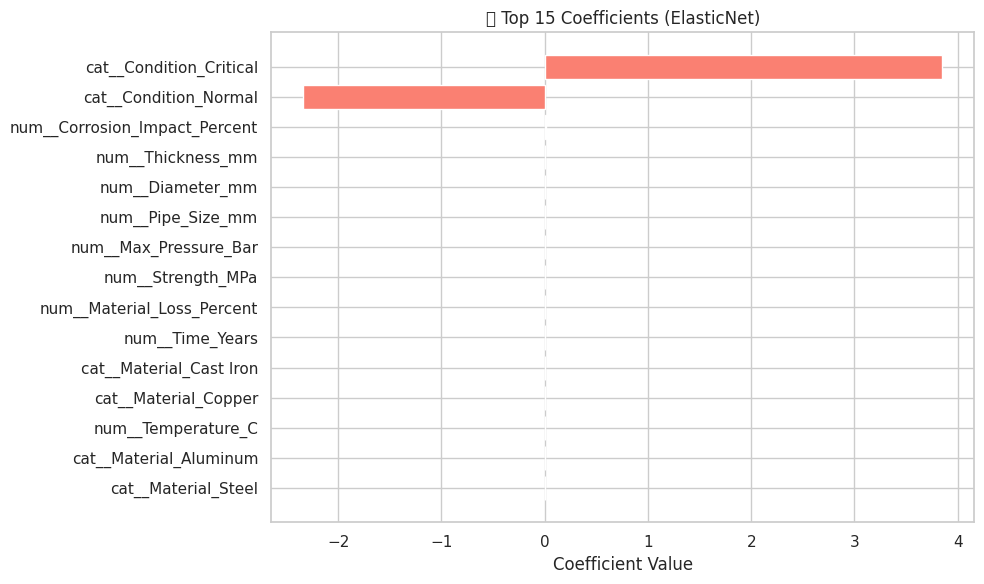

                          Feature  Coefficient   AbsCoef
0         cat__Condition_Critical     3.848476  3.848476
1           cat__Condition_Normal    -2.336638  2.336638
2   num__Corrosion_Impact_Percent     0.013041  0.013041
3               num__Thickness_mm    -0.000000  0.000000
4                num__Diameter_mm    -0.000000  0.000000
5               num__Pipe_Size_mm     0.000000  0.000000
6           num__Max_Pressure_Bar     0.000000  0.000000
7               num__Strength_MPa    -0.000000  0.000000
8      num__Material_Loss_Percent    -0.000000  0.000000
9                 num__Time_Years    -0.000000  0.000000
10        cat__Material_Cast Iron     0.000000  0.000000
11           cat__Material_Copper     0.000000  0.000000
12             num__Temperature_C     0.000000  0.000000
13         cat__Material_Aluminum    -0.000000  0.000000
14            cat__Material_Steel    -0.000000  0.000000
15              cat__Material_PVC     0.000000  0.000000
16                   cat__Grade

In [ ]:
# Example: best tuned ElasticNet
best_model_linear = best_models["ElasticNet"]

# Get feature names
feature_names = preprocessor.get_feature_names_out()

# Get coefficients
coefs = best_model_linear.named_steps["model"].coef_
coef_df = pd.DataFrame({"Feature": feature_names, "Coefficient": coefs})
coef_df["AbsCoef"] = coef_df["Coefficient"].abs()
coef_df = coef_df.sort_values(by="AbsCoef", ascending=False).reset_index(drop=True)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(coef_df["Feature"][:15], coef_df["Coefficient"][:15], color="salmon")
plt.gca().invert_yaxis()
plt.title("🔎 Top 15 Coefficients (ElasticNet)")
plt.xlabel("Coefficient Value")
plt.tight_layout()
plt.show()

print(coef_df.head(20))  # Show top 20 features


In [ ]:
#saved the tune elasticNet model

In [ ]:
import joblib

# Save the model
joblib.dump(best_models["ElasticNet"], "tuned_elasticnet_model.pkl")

print("✅ Tuned ElasticNet model saved as tuned_elasticnet_model.pkl")


✅ Tuned ElasticNet model saved as tuned_elasticnet_model.pkl
